In [1]:
from pynwb import NWBHDF5IO
from pathlib import Path
import numpy as np
import mne
from pipeline.utils import make_mne_epochs, make_epochs_tfr

In [ ]:
sbj, session = 4, 3

fname = "sub-{0:>02d}_ses-{1:.0f}_behavior+ecephys.nwb".format(sbj, session)

io = NWBHDF5IO(Path('../data', fname), mode='r', load_namespaces=True)

nwb = io.read()

In [13]:
neural_data = nwb.acquisition['ElectricalSeries'].data

print("Neural data shape: ", neural_data.shape)
n_times, n_chan = neural_data.shape
SF = nwb.acquisition['ElectricalSeries'].rate
print("Sampling rate: ", SF)

info = mne.create_info(n_chan, ch_types='ecog', sfreq=SF)


mne_data_chunk = mne.io.RawArray(neural_data[:].reshape(n_chan, -1), info)

Neural data shape:  (28175839, 84)
Sampling rate:  500.0
Creating RawArray with float64 data, n_channels=84, n_times=28175839
    Range : 0 ... 28175838 =      0.000 ... 56351.676 secs
Ready.


In [14]:
trials = np.array(nwb.intervals['reaches']['start_time'].data) * SF
trials = trials[(trials > SF * 2) & (trials < neural_data.shape[0] - SF * 2)]
print("N trials: ", len(trials))

N trials:  13


In [15]:
epochs = make_mne_epochs(mne_data_chunk, trials, -0.5, 1.5)
epochs.info

Not setting metadata
13 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 13 events and 1001 original time points ...
0 bad epochs dropped


<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 84 ECoG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 84
 projs: []
 sfreq: 500.0 Hz
>

In [16]:
epochs_tfr = make_epochs_tfr(epochs)
epochs_tfr.info

Not setting metadata


<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 84 ECoG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 84
 projs: []
 sfreq: 500.0 Hz
>

In [20]:
epochs_tfr.data.shape

(13, 84, 8, 1001)

In [22]:
avgpower = epochs_tfr.average(dim = 'epochs')


<AverageTFR | time : [-0.500000, 1.500000], freq : [10.000000, 150.000000], nave : 13, channels : 84, ~5.2 MB>

Applying baseline correction (mode: mean)


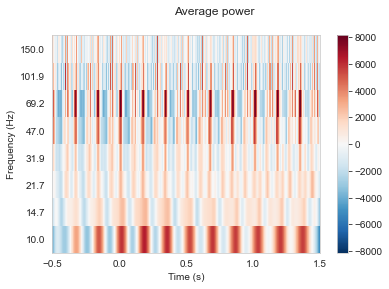

[<Figure size 432x288 with 2 Axes>]

In [28]:
avgpower.plot(picks=[0], title="Average power", baseline=(-0.5, 0), mode='mean')